In [6]:
%matplotlib widget
import lmfit
import h5py
import numpy as np

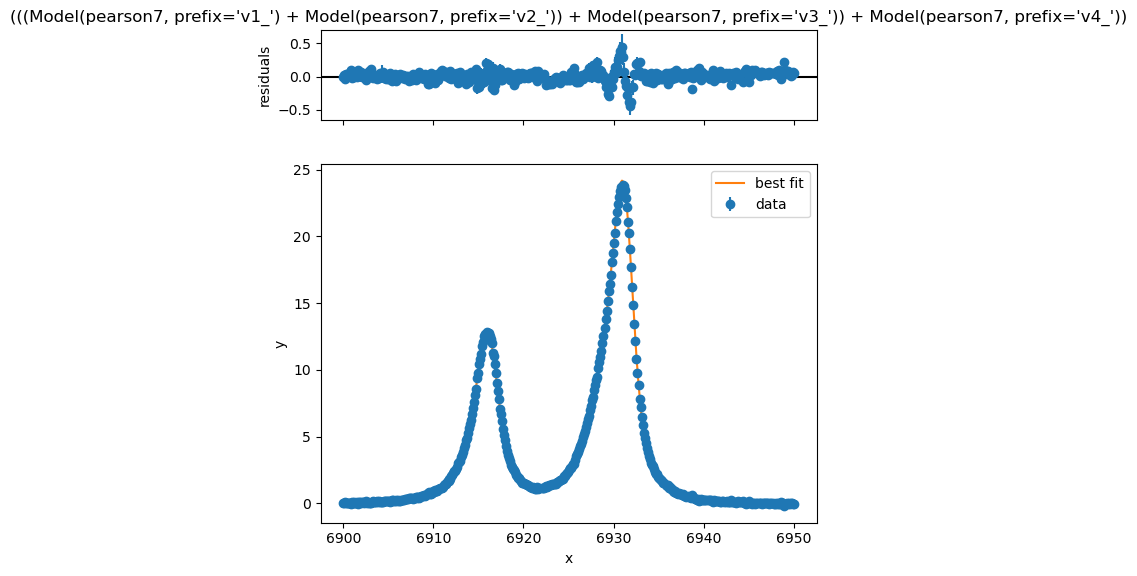

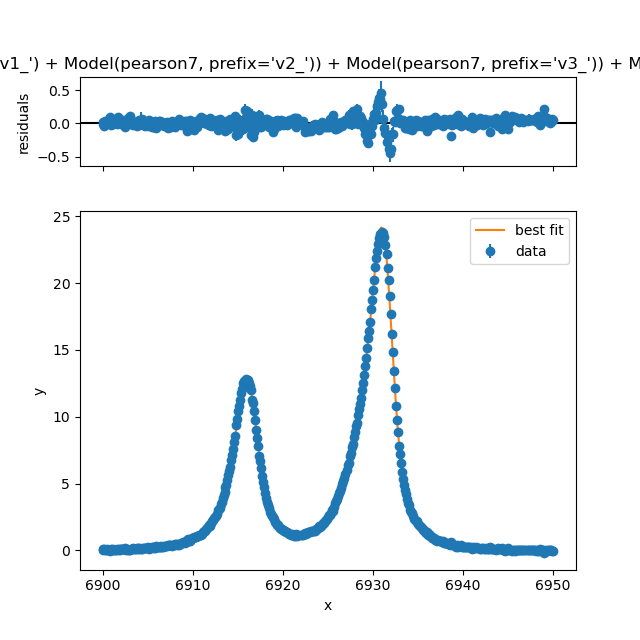

In [10]:
with h5py.File(r'/home/otteflor/scratch/tmp_fit/test_fit/04_compare.h5', 'r') as h5_file:
    x = h5_file['fit_data/x'][()]
    y = h5_file['fit_data/y'][()]
    errors = h5_file['fit_data/errors'][()]
    
model = lmfit.models.Pearson7Model(prefix = 'v1_') + lmfit.models.Pearson7Model(prefix = 'v2_') + lmfit.models.Pearson7Model(prefix = 'v3_') + lmfit.models.Pearson7Model(prefix = 'v4_')
model.set_param_hint('v1_center', value = 6912.8, min = 6900, max = 6920)
model.set_param_hint('v2_center', value = 6916, min = 6900, max = 6920)
model.set_param_hint('v3_center', value = 6927, min = 6920, max = 6940)
model.set_param_hint('v4_center', value = 6931, min = 6920, max = 6940)

model.set_param_hint('v1_amplitude', min = 0.1)
model.set_param_hint('v2_amplitude', min = 0.1)
model.set_param_hint('v3_amplitude', min = 0.1)
model.set_param_hint('v4_amplitude', min = 0.1)

model.set_param_hint('v1_sigma', min = 0.5)
model.set_param_hint('v2_sigma', min = 0.5)
model.set_param_hint('v3_sigma', min = 0.5)
model.set_param_hint('v4_sigma', min = 0.5)

r = model.fit(x = x, data = y[0], weights = 1/errors, scale_covar = False)
display(r)
r.plot()

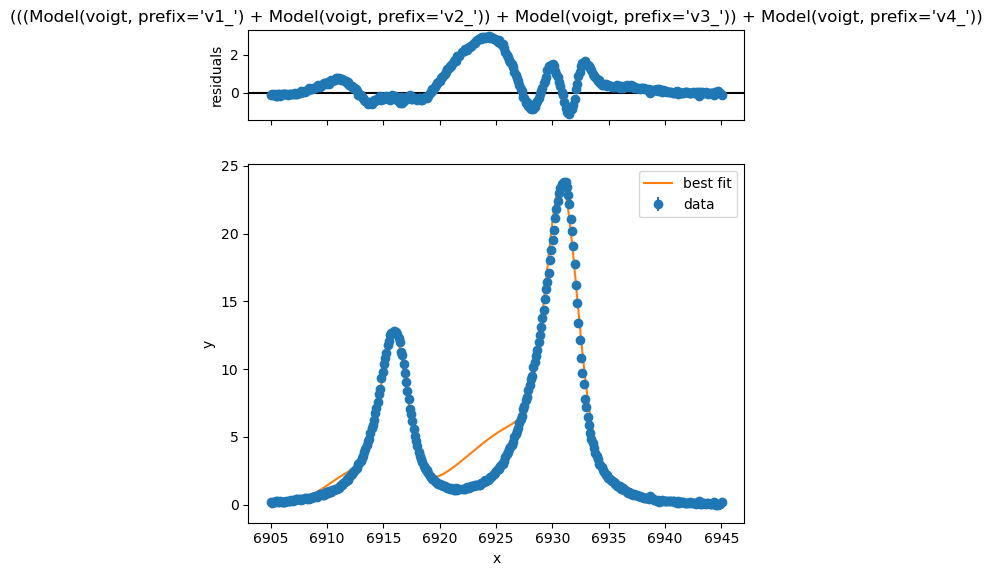

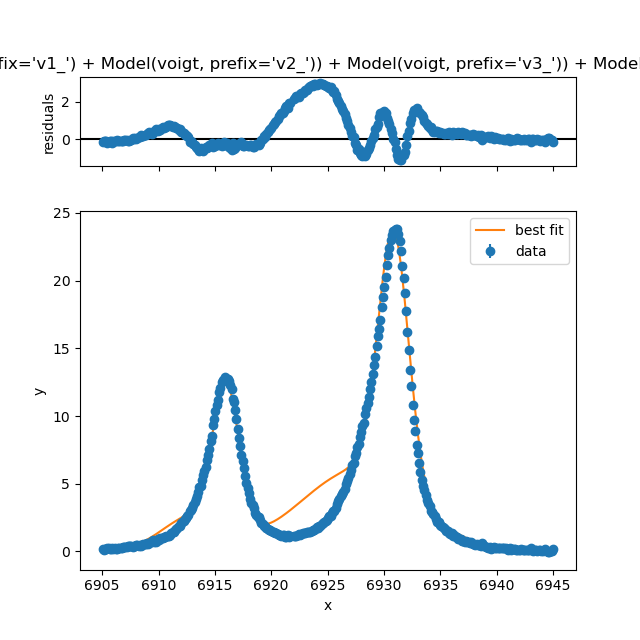

In [12]:
with h5py.File(r'/home/otteflor/scratch/tmp_fit/test_fit_pearson7/04_compare.h5', 'r') as h5_file:
    x = h5_file['fit_data/x'][()]
    y = h5_file['fit_data/y'][()]
    
model = lmfit.models.VoigtModel(prefix = 'v1_') + lmfit.models.VoigtModel(prefix = 'v2_') + lmfit.models.VoigtModel(prefix = 'v3_') + lmfit.models.VoigtModel(prefix = 'v4_')
model.set_param_hint('v1_center', value = 6912.8, min = 6900, max = 6920)
model.set_param_hint('v2_center', value = 6916, min = 6900, max = 6920)
model.set_param_hint('v3_center', value = 6927, min = 6920, max = 6940)
model.set_param_hint('v4_center', value = 6931, min = 6920, max = 6940)

model.set_param_hint('v1_amplitude', min = 0.1)
model.set_param_hint('v2_amplitude', min = 0.1)
model.set_param_hint('v3_amplitude', min = 0.1)
model.set_param_hint('v4_amplitude', min = 0.1)

model.set_param_hint('v1_sigma', min = 0.5)
model.set_param_hint('v2_sigma', min = 0.5)
model.set_param_hint('v3_sigma', min = 0.5)
model.set_param_hint('v4_sigma', min = 0.5)


model.set_param_hint('v1_gamma', min = 0.1, vary = True, expr = "")
model.set_param_hint('v2_gamma', min = 0.1, vary = True, expr = "")
model.set_param_hint('v3_gamma', min = 0.1, vary = True, expr = "")
model.set_param_hint('v4_gamma', min = 0.1, vary = True, expr = "")


errors = np.zeros (x.shape) + 0.1 
r = model.fit(x = x, data = y[0], weights = 1/errors, scale_covar = False, method = "nelder")
display(r)
r.plot()